# Waterwebservices: POST-requests versus ddlpy

The Rijkswaterstaat Waterwebservices provide access to almost all measurement data collected by Rijkswaterstaat. Users can send HTTP POST requests to retrieve specific (meta)data from the https://ddapi20-waterwebservices.rijkswaterstaat.nl API. There are five public endpoints:
* `/METADATASERVICES/OphalenCatalogus`
* `/ONLINEWAARNEMINGENSERVICES/OphalenWaarnemingen`
* `/ONLINEWAARNEMINGENSERVICES/OphalenLaatsteWaarnemingen`
* `/ONLINEWAARNEMINGENSERVICES/CheckWaarnemingenAanwezig`
* `/ONLINEWAARNEMINGENSERVICES/OphalenAantalWaarnemingen`

The new RWS Waterwebservices are live since 5 December 2025. They are documented on https://rijkswaterstaatdata.nl/waterdata. This page also contains a link to migrate from the old to the new Waterwebservices: ["overschakel-documentatie"](https://rijkswaterstaatdata.nl/projecten/waterwebservices-overschakeling), which in turn contains a link to the [RWS webinar Waterdata](https://www.youtube.com/watch?v=T5jkHv7PFaA). On the Waterwebservices Github, users can [post questions/discussions](https://github.com/Rijkswaterstaat/WaterWebservices/discussions) or [report issues/bugs](https://github.com/Rijkswaterstaat/WaterWebservices/issues).

ddlpy is a simple wrapper around the Waterwebservices, providing convenient access to (meta)data on the Waterwebservices. Issues in ddlpy can be reported on the ddlpy Github.

This notebook provides some examples of POST-requests and responses, followed by the easier ddlpy alternative.


## POST-requests: retrieving the catalog

The `/METADATASERVICES/OphalenCatalogus` endpoint provides metadata, for instance:
* `LocatieLijst`: a list of locations
* `AquoMetadataLijst`: a list of metadata
* `AquoMetadataLocatieLijst`: a list of location-metadata combinations


In [1]:
# imports
import requests
import pandas as pd
# retrieve the catalog
url = "https://ddapi20-waterwebservices.rijkswaterstaat.nl/METADATASERVICES/OphalenCatalogus"
true = True
req = {"CatalogusFilter": {"Eenheden": true, "Grootheden": true, "Hoedanigheden": true, "Groeperingen": true, "Parameters": true, "Typeringen": true, "ProcesTypes": true, "Compartimenten": true}}

resp = requests.post(url=url, json=req)
result_cat = resp.json()
print("Available keys in the response:")
print(result_cat.keys())


Available keys in the response:
dict_keys(['Succesvol', 'AquoMetadataLijst', 'AquoMetadataLocatieLijst', 'BemonsteringshoogteLijst', 'LocatieLijst', 'OpdrachtgevendeInstantieLijst', 'ReferentievlakLijst', 'StatuswaardeLijst'])


The `LocatieLijst` contains information like name/coordinates/ID of all the locations for which measurements are available in the Waterwebservices.

In [2]:
# get all dataframes from the response
print("LocatieLijst raw output (first few entries):")
print(result_cat["LocatieLijst"][:2], "[...]")
print()
print("LocatieLijst pandas DataFrame:")
df_LocatieLijst = pd.DataFrame(result_cat["LocatieLijst"])
# print the list of available locations
df_LocatieLijst


LocatieLijst raw output (first few entries):
[{'Code': '4epetroleumhaven', 'Lat': 51.953524, 'Lon': 4.140491, 'Coordinatenstelsel': 'ETRS89', 'Naam': '4e Petroleumhaven', 'Omschrijving': '4e Petroleumhaven', 'Locatie_MessageID': 10603}, {'Code': '7epetroleumhaven', 'Lat': 51.915615, 'Lon': 4.21277, 'Coordinatenstelsel': 'ETRS89', 'Naam': '7e Petroleumhaven', 'Omschrijving': '7e Petroleumhaven', 'Locatie_MessageID': 17056}] [...]

LocatieLijst pandas DataFrame:


,Code,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Locatie_MessageID
0,4epetroleumhaven,51.953524,4.140491,ETRS89,4e Petroleumhaven,4e Petroleumhaven,10603
1,7epetroleumhaven,51.915615,4.212770,ETRS89,7e Petroleumhaven,7e Petroleumhaven,17056
2,a12,55.383333,3.800000,ETRS89,A12,platform,3627
3,aadorp,52.372600,6.633300,ETRS89,Aadorp,Aadorp,11036
4,aa.helmond,51.488763,5.682549,ETRS89,"Aa, Helmond","Aa, Helmond",2303
...,...,...,...,...,...,...,...
2432,zwolle,52.523047,6.069995,ETRS89,Zwolle,"Hasselterhaven, Zwarte Water",16580
2433,zwolle.ijssel,52.508600,6.053000,ETRS89,"Zwolle, IJssel",voorheen Katerveer,144
2434,zwolle.zwartewater.kanaal,52.509831,6.054957,ETRS89,"Zwolle, Zwarte Water, kanaal",voorheen Spooldersluis binnen,1489
2435,zwolsehoek.badstrand,52.615386,5.653051,ETRS89,"Zwolse Hoek, badstrand","Zwolse Hoek, badstrand",10007


The `AquoMetadataLijst` contains metadata for all the parameters available in the Waterwebservices. After converting the response to a `pandas.DataFrame()` with `pd.json_normalize()`, the response is a `DataFrame` with the following columns:
* Combination of `*.Code` and `*.Omschrijving` columns for all parameters in `CatalogusFilter` provided in the POST request
* `Parameter_Wat_Omschrijving` is a readable description of what is measured, a combination of several other ".Omschrijving" columns
* `AquoMetadata_MessageID` is a unique identifier of the metadata entry.

In [3]:
print("AquoMetadataLijst raw output (first few entries):")
print(result_cat["AquoMetadataLijst"][:1], "[...]")
print()
print("AquoMetadataLijst pandas DataFrame:")
df_AquoMetadataLijst = pd.json_normalize(result_cat["AquoMetadataLijst"])
# print the list of available metadata
df_AquoMetadataLijst


AquoMetadataLijst raw output (first few entries):
[{'Compartiment': {'Code': 'OW', 'Omschrijving': 'Oppervlaktewater'}, 'Grootheid': {'Code': '50%_L', 'Omschrijving': '50 percentiel van de levendigheid'}, 'Eenheid': {'Code': 'cm2', 'Omschrijving': 'vierkante centimeter'}, 'Hoedanigheid': {'Code': 'NVT', 'Omschrijving': 'NVT'}, 'Parameter': {'Code': 'NVT', 'Omschrijving': 'NVT'}, 'Groepering': {'Code': 'LEVDHD5', 'Omschrijving': 'Levendigheid'}, 'Typering': {'Code': 'LEVDHD', 'Omschrijving': 'Levendigheid'}, 'Parameter_Wat_Omschrijving': 'Percentielen per etmaal Levendigheid 50 percentiel van de levendigheid in Oppervlaktewater in cm2', 'ProcesType': 'meting', 'AquoMetadata_MessageID': 559}] [...]

AquoMetadataLijst pandas DataFrame:


,Parameter_Wat_Omschrijving,ProcesType,AquoMetadata_MessageID,Compartiment.Code,Compartiment.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Typering.Code,Typering.Omschrijving
0,Percentielen per etmaal Levendigheid 50 percen...,meting,559,OW,Oppervlaktewater,50%_L,50 percentiel van de levendigheid,cm2,vierkante centimeter,NVT,NVT,NVT,NVT,LEVDHD5,Levendigheid,LEVDHD,Levendigheid
1,Percentielen per etmaal Levendigheid 70 percen...,meting,1392,OW,Oppervlaktewater,70%_L,70 percentiel van de levendigheid,cm2,vierkante centimeter,NVT,NVT,NVT,NVT,LEVDHD5,Levendigheid,LEVDHD,Levendigheid
2,Percentielen per etmaal Levendigheid 80 percen...,meting,1026,OW,Oppervlaktewater,80%_L,80 percentiel van de levendigheid,cm2,vierkante centimeter,NVT,NVT,NVT,NVT,LEVDHD5,Levendigheid,LEVDHD,Levendigheid
3,Percentielen per etmaal Levendigheid 90 percen...,meting,1708,OW,Oppervlaktewater,90%_L,90 percentiel van de levendigheid,cm2,vierkante centimeter,NVT,NVT,NVT,NVT,LEVDHD5,Levendigheid,LEVDHD,Levendigheid
4,"Aantal Plastic deeltjes, herkomst industrie (p...",meting,1260,OE,Organisme (biota),AANTL,Aantal,DIMSLS,dimensieloos,NVT,NVT,OSPAR_PLAIND,"Plastic deeltjes, herkomst industrie (plastic ...",OSPAR_PLAIND_MOV,Plastic deeltjes van industrie (granulaat) onv...,NVT,NVT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,1' scalair gemiddelde van de windsnelheid in L...,meting,504,LT,Lucht,WS1,1' scalair gemiddelde van de windsnelheid,m/s,meter per seconde,NVT,NVT,NVT,NVT,,,NVT,NVT
2014,10' scalair genmiddelde van de windsnelheid in...,meting,1830,LT,Lucht,WS10,10' scalair genmiddelde van de windsnelheid,m/s,meter per seconde,NVT,NVT,NVT,NVT,,,NVT,NVT
2015,10' scalair genmiddelde van de windsnelheid in...,meting,379,LT,Lucht,WS10,10' scalair genmiddelde van de windsnelheid,m/s,meter per seconde,NVT,NVT,NVT,NVT,WS10STD2,mux van WS10 en WS10STD,NVT,NVT
2016,Doorzicht in Oppervlaktewater in dm,meting,1960,OW,Oppervlaktewater,ZICHT,Doorzicht,dm,decimeter,NVT,NVT,NVT,NVT,,,NVT,NVT


The `AquoMetadataLocatieLijst` is a list of metadata-location-combinations. It contains the `AquoMetadata_MessageID` from `AquoMetadataLijst` and `Locatie_MessageID` from `LocatieLijst`.

In [4]:
print("AquoMetadataLocatieLijst raw output (first few entries):")
print(result_cat["AquoMetadataLocatieLijst"][:6], "[...]")
print()
print("AquoMetadataLocatieLijst pandas DataFrame:")
df_AquoMetadataLocatieLijst = pd.DataFrame(result_cat["AquoMetadataLocatieLijst"])
# print the list of location/metadata combinations
df_AquoMetadataLocatieLijst


AquoMetadataLocatieLijst raw output (first few entries):
[{'AquoMetaData_MessageID': 1957, 'Locatie_MessageID': 12815}, {'AquoMetaData_MessageID': 500, 'Locatie_MessageID': 9057}, {'AquoMetaData_MessageID': 562, 'Locatie_MessageID': 14415}, {'AquoMetaData_MessageID': 512, 'Locatie_MessageID': 6068}, {'AquoMetaData_MessageID': 1335, 'Locatie_MessageID': 18056}, {'AquoMetaData_MessageID': 1528, 'Locatie_MessageID': 5779}] [...]

AquoMetadataLocatieLijst pandas DataFrame:


,AquoMetaData_MessageID,Locatie_MessageID
0,1957,12815
1,500,9057
2,562,14415
3,512,6068
4,1335,18056
...,...,...
96977,1720,13083
96978,321,15467
96979,955,98
96980,1060,10169


## POST-requests: selecting locations/metadata
When combining the information from these three lists, it is possible to retrieve for instance waterlevels for Hoek van Holland:
1. Get the `Locatie_MessageID` from `df_LocatieLijst`
2. Get a list of available `AquoMetaData_MessageID` (metadata) for this `Locatie_MessageID` (location) from `df_AquoMetadataLocatieLijst`
3. Filter the `df_AquoMetadataLijst` based on location, and the desired metadata (for instance water level: `Grootheid.Code==WATHTE`)

In [5]:
# first get the station Locatie_MessageID from df_locations via the station Code
bool_station = df_LocatieLijst["Code"] == 'hoekvanholland'
locatie_messid = df_LocatieLijst.loc[bool_station]["Locatie_MessageID"].iloc[0]
# print the location ID for the selected station
locatie_messid

np.int64(1319)

In [6]:
# get the available metadata (AquoMetaData_MessageID) for this station from df_AquoMetadataLocatieLijst
bool_station_in_metadatalocation = df_AquoMetadataLocatieLijst["Locatie_MessageID"] == locatie_messid
meta_messid_for_station = df_AquoMetadataLocatieLijst.loc[bool_station_in_metadatalocation]["AquoMetaData_MessageID"]
# print the metadata ID's available for the selected station
meta_messid_for_station

1827     1305
4001      817
6609     1577
10246    1117
12052    1392
         ... 
95444    1060
95966     389
96205     288
96261    1116
96883     904
Name: AquoMetaData_MessageID, Length: 65, dtype: int64

In [7]:
# from those, get the waterhoogte-related metadata (for this station)
bool_meta_for_station = df_AquoMetadataLijst["AquoMetadata_MessageID"].isin(meta_messid_for_station.values)
bool_wathte = df_AquoMetadataLijst["Grootheid.Code"] == "WATHTE"
station_wathte_data = df_AquoMetadataLijst.loc[bool_meta_for_station & bool_wathte]
# print the selection
station_wathte_data


,Parameter_Wat_Omschrijving,ProcesType,AquoMetadata_MessageID,Compartiment.Code,Compartiment.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Eenheid.Code,Eenheid.Omschrijving,Hoedanigheid.Code,Hoedanigheid.Omschrijving,Parameter.Code,Parameter.Omschrijving,Groepering.Code,Groepering.Omschrijving,Typering.Code,Typering.Omschrijving
1991,Waterhoogte verwachting in Oppervlaktewater t....,verwachting,817,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,NVT,NVT
1995,Etmaalgemiddelde Waterhoogte in Oppervlaktewat...,meting,1774,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,GETETM2,Getijextremen,NVT,NVT
1996,Etmaalgemiddelde Waterhoogte in Oppervlaktewat...,meting,1353,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,NVT,NVT
1997,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,1332,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,,,NVT,NVT
2000,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,518,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,centimeter,NAP,t.o.v. Normaal Amsterdams Peil,NVT,NVT,GETETBRKD2,Getijextreem berekend,NVT,NVT


## POST-requests: retrieving measurements
Finally, we can retrieve the measurements for a desired period with the `/ONLINEWAARNEMINGENSERVICES/OphalenWaarnemingen` endpoint. Depending on the input provided via "AquoMetadata", "Locatie" and "Periode" there is a certain amount of data returned. There is a maximum of 160000 waarnemingen returned per request.

In [8]:
# retrieve the measurements
url = "https://ddapi20-waterwebservices.rijkswaterstaat.nl/ONLINEWAARNEMINGENSERVICES/OphalenWaarnemingen"
req = {
    "AquoPlusWaarnemingMetadata": {
        "AquoMetadata": {
            "ProcesType": "meting", # meting/astronomisch/verwachting
            "Grootheid": {"Code": "WATHTE"}, 
            "Hoedanigheid": {"Code": "NAP"},
            "Groepering": {"Code": ""}, # ""/GETETBRKD2/GETETM2
            # "Compartiment": {"Code": "OW"},
            # "Eenheid": {"Code": "cm"},
            # "Parameter": {"Code": "NVT"},
            # "BioTaxon": {"Code": "NVT"},
            # "Orgaan": {"Code": "NVT"},
            # "Typering": {"Code": "NVT"},
            # "WaardeBewerkingsMethode": {"Code": "NVT"},
        }
    },
    "Locatie": {"Code": "hoekvanholland"},
    "Periode": {"Begindatumtijd": "2023-01-01T00:00:00.000+00:00", "Einddatumtijd": "2023-01-15T00:00:00.000+00:00"}
}
resp = requests.post(url=url, json=req)
if not resp.ok:
    raise Exception(f"{resp.status_code} {resp.reason}: {resp.text}")

result_meas = resp.json()
print("Available keys in the response:")
print(result_meas["WaarnemingenLijst"][0].keys())
print()
print("MetingenLijst raw (first few entries):")
print(result_meas["WaarnemingenLijst"][0]["MetingenLijst"][:2], "[...]")
print()
print("MetingenLijst:")
# print the metingenlijst
pd.json_normalize(result_meas["WaarnemingenLijst"][0]["MetingenLijst"])


Available keys in the response:
dict_keys(['AquoMetadata', 'Locatie', 'MetingenLijst'])

MetingenLijst raw (first few entries):
[{'Meetwaarde': {'Waarde_Alfanumeriek': '63', 'Waarde_Numeriek': 63.0}, 'Tijdstip': '2023-01-01T01:00:00.000+01:00', 'WaarnemingMetadata': {'Statuswaarde': 'Gecontroleerd', 'Bemonsteringshoogte': '-999999999', 'Referentievlak': 'NVT', 'OpdrachtgevendeInstantie': 'RIKZMON_WAT', 'Kwaliteitswaardecode': '00'}}, {'Meetwaarde': {'Waarde_Alfanumeriek': '56', 'Waarde_Numeriek': 56.0}, 'Tijdstip': '2023-01-01T01:10:00.000+01:00', 'WaarnemingMetadata': {'Statuswaarde': 'Gecontroleerd', 'Bemonsteringshoogte': '-999999999', 'Referentievlak': 'NVT', 'OpdrachtgevendeInstantie': 'RIKZMON_WAT', 'Kwaliteitswaardecode': '00'}}] [...]

MetingenLijst:


,Tijdstip,Meetwaarde.Waarde_Alfanumeriek,Meetwaarde.Waarde_Numeriek,WaarnemingMetadata.Statuswaarde,WaarnemingMetadata.Bemonsteringshoogte,WaarnemingMetadata.Referentievlak,WaarnemingMetadata.OpdrachtgevendeInstantie,WaarnemingMetadata.Kwaliteitswaardecode
0,2023-01-01T01:00:00.000+01:00,63,63.0,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00
1,2023-01-01T01:10:00.000+01:00,56,56.0,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00
2,2023-01-01T01:20:00.000+01:00,51,51.0,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00
3,2023-01-01T01:30:00.000+01:00,46,46.0,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00
4,2023-01-01T01:40:00.000+01:00,40,40.0,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00
...,...,...,...,...,...,...,...,...
2012,2023-01-15T00:20:00.000+01:00,15,15.0,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00
2013,2023-01-15T00:30:00.000+01:00,13,13.0,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00
2014,2023-01-15T00:40:00.000+01:00,10,10.0,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00
2015,2023-01-15T00:50:00.000+01:00,8,8.0,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00


## ddlpy: a wrapper around the RWS Waterwebservices
The code above becomes much simpler with ddlpy:
* proper handling of potential errors returned by the server
* all (meta)data automatically converted to `pandas.DataFrame`
* `ddlpy.locations()` is a combination of all available locations and measurements, so this is the only DataFrame required for subsetting
* `ddlpy.measurements()` takes one row of `ddlpy.locations()` DataFrame, `start_date` and `end_date`
* Retrieving per year/month/day makes it possible to retrieve longer timeseries at once


In [9]:
# imports
import ddlpy
import pandas as pd

# enabling debug logging so we can see what happens in the background
import logging
logging.basicConfig()
logging.getLogger("ddlpy").setLevel(logging.DEBUG)


## ddlpy: retrieving the catalog


In [10]:
# get the dataframe with locations and their available parameters
locations = ddlpy.locations()
locations


INFO:ddlpy.ddlpy:Retrieving Waterwebservices catalog, this can take 30 seconds
DEBUG:ddlpy.ddlpy:Requesting at https://ddapi20-waterwebservices.rijkswaterstaat.nl/METADATASERVICES/OphalenCatalogus with request: {"CatalogusFilter": {"WaardeBewerkingsMethoden": true, "Typeringen": true, "Grootheden": true, "Parameters": true, "ProcesTypes": true, "Compartimenten": true, "Hoedanigheden": true, "Organen": true, "BioTaxon": true, "Eenheden": true, "Groeperingen": true}}


,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,BioTaxon.Code,BioTaxon.Omschrijving,Orgaan.Code,Orgaan.Omschrijving,Groepering.Code,Groepering.Omschrijving,Typering.Code,Typering.Omschrijving,WaardeBewerkingsMethode.Code,WaardeBewerkingsMethode.Omschrijving
Code,,,,,,,,,,,,,,,,,,,,,
j6,10212,53.816632,2.950010,ETRS89,J6,platform,Windrichting in Lucht t.o.v. ware Noorden in g...,meting,LT,Lucht,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
spijkenisse.oudemaas.brug,2611,51.859612,4.339860,ETRS89,"Spijkenisse, Oude Maas, Brug","voorheen Spijkenissebrug westelijke doorvaart,...",(massa)Concentratie chloride in Oppervlaktewat...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
goeree6kmuitdekust,12815,51.868923,3.872311,ETRS89,Goeree 6 km uit de kust,Goeree 6 km uit de kust,(massa)Concentratie diflubenzuron in Oppervlak...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
brakel,10578,51.826764,5.104336,ETRS89,Brakel,Andelse Maas,(massa)Concentratie gamma-hexachloorcyclohexaa...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
oosterhout,12201,51.630371,4.871365,ETRS89,Oosterhout,Oosterhout,(massa)Concentratie perfluorundecaanzuur in Op...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kuilvanmarken,4482,52.478941,5.270994,ETRS89,Kuil van Marken,Kuil van Marken,(massa)Concentratie ammonium in Oppervlaktewat...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
hellevoetsluis.schenkeldijk.badstrand,17673,51.829859,4.093135,ETRS89,"Hellevoetsluis, Schenkeldijk, badstrand","Hellevoetsluis, Schenkeldijk, badstrand",Aanwezigheid Schuim in Oppervlaktewater,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
stadaantharingvliet.drinkwaterinnnamepunt,98,51.752834,4.223002,ETRS89,"Stad aan het Haringvliet, drinkwaterinnnamepunt","Stad aan het Haringvliet, drinkwaterinnnamepunt",(massa)Concentratie wolfraam in Oppervlaktewat...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT


## ddlpy: selecting locations/metadata
Since `locations` already is a combination of all locations/metadata, this is the only `DataFrame` that is required for subsetting.


In [11]:
# Filter all measurements for a single station
bool_stations = locations.index.isin(["hoekvanholland"])
selected = locations.loc[bool_stations]
# print the selection
selected

,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,BioTaxon.Code,BioTaxon.Omschrijving,Orgaan.Code,Orgaan.Omschrijving,Groepering.Code,Groepering.Omschrijving,Typering.Code,Typering.Omschrijving,WaardeBewerkingsMethode.Code,WaardeBewerkingsMethode.Omschrijving
Code,,,,,,,,,,,,,,,,,,,,,
hoekvanholland,1319,51.976899,4.119827,ETRS89,Hoek van Holland,rechter oever kilometer 1030.1,(massa)Concentratie fosfor totaal in Oppervlak...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
hoekvanholland,1319,51.976899,4.119827,ETRS89,Hoek van Holland,rechter oever kilometer 1030.1,Laagwater dag in Oppervlaktewater t.o.v. Norma...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
hoekvanholland,1319,51.976899,4.119827,ETRS89,Hoek van Holland,rechter oever kilometer 1030.1,Verzadigingsgraad zuurstof in Oppervlaktewater...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
hoekvanholland,1319,51.976899,4.119827,ETRS89,Hoek van Holland,rechter oever kilometer 1030.1,Getijextreemtype in Oppervlaktewater,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,GETVVGBRKD2,Getijvervroeging berekend,GETETTPE,Getijextreemtype,NVT,NVT
hoekvanholland,1319,51.976899,4.119827,ETRS89,Hoek van Holland,rechter oever kilometer 1030.1,Waterhoogte astronomisch in Oppervlaktewater t...,astronomisch,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hoekvanholland,1319,51.976899,4.119827,ETRS89,Hoek van Holland,rechter oever kilometer 1030.1,(massa)Concentratie ammonium in Oppervlaktewat...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
hoekvanholland,1319,51.976899,4.119827,ETRS89,Hoek van Holland,rechter oever kilometer 1030.1,(massa)Concentratie kwik in Oppervlaktewater i...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT
hoekvanholland,1319,51.976899,4.119827,ETRS89,Hoek van Holland,rechter oever kilometer 1030.1,(massa)Concentratie chloride in Oppervlaktewat...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT


In [12]:
# Filter the locations dataframe with the desired parameters and stations.
bool_stations = locations.index.isin(["hoekvanholland"])
# meting/astronomisch/verwachting
bool_procestype = locations["ProcesType"].isin(["meting"])
# waterlevel/waterhoogte (WATHTE)
bool_grootheid = locations["Grootheid.Code"].isin(["WATHTE"])
# timeseries ("") versus extremes (GETETM2/GETETMSL2/GETETBRKD2/GETETBRKDMSL2)
bool_groepering = locations["Groepering.Code"].isin([""])
# vertical reference (NAP/MSL)
bool_hoedanigheid = locations["Hoedanigheid.Code"].isin(["NAP"])
selected = locations.loc[
    bool_procestype
    & bool_stations
    & bool_grootheid
    & bool_groepering
    & bool_hoedanigheid
    ]
# print the selection
selected


,Locatie_MessageID,Lat,Lon,Coordinatenstelsel,Naam,Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Compartiment.Code,Compartiment.Omschrijving,...,BioTaxon.Code,BioTaxon.Omschrijving,Orgaan.Code,Orgaan.Omschrijving,Groepering.Code,Groepering.Omschrijving,Typering.Code,Typering.Omschrijving,WaardeBewerkingsMethode.Code,WaardeBewerkingsMethode.Omschrijving
Code,,,,,,,,,,,,,,,,,,,,,
hoekvanholland,1319,51.976899,4.119827,ETRS89,Hoek van Holland,rechter oever kilometer 1030.1,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,OW,Oppervlaktewater,...,NVT,NVT,NVT,NVT,,,NVT,NVT,NVT,NVT


## ddlpy: retrieving measurements
A single line of the `locations` (or `selected) row can be passed to `ddlpy.measurements()`, together with a start_date/end_date, to retrieve the selected measurements.

In [13]:
# provide a single row of the locations dataframe to ddlpy.measurements
start_date = "2023-01-01"
end_date = "2023-01-15"
measurements = ddlpy.measurements(selected.iloc[0], start_date=start_date, end_date=end_date)
# print the retrieved measurements
measurements

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.38it/s]
DEBUG:ddlpy.ddlpy:0 duplicated values dropped


,WaarnemingMetadata.Statuswaarde,WaarnemingMetadata.Bemonsteringshoogte,WaarnemingMetadata.Referentievlak,WaarnemingMetadata.OpdrachtgevendeInstantie,WaarnemingMetadata.Kwaliteitswaardecode,Compartiment.Code,Compartiment.Omschrijving,Grootheid.Code,Grootheid.Omschrijving,Eenheid.Code,...,WaardeBewerkingsMethode.Omschrijving,Parameter_Wat_Omschrijving,ProcesType,Meetwaarde.Waarde_Alfanumeriek,Meetwaarde.Waarde_Numeriek,Code,Coordinatenstelsel,Naam,Lon,Lat
time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 01:00:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,63,63.0,hoekvanholland,ETRS89,Hoek van Holland,4.119827,51.976899
2023-01-01 01:10:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,56,56.0,hoekvanholland,ETRS89,Hoek van Holland,4.119827,51.976899
2023-01-01 01:20:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,51,51.0,hoekvanholland,ETRS89,Hoek van Holland,4.119827,51.976899
2023-01-01 01:30:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,46,46.0,hoekvanholland,ETRS89,Hoek van Holland,4.119827,51.976899
2023-01-01 01:40:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,40,40.0,hoekvanholland,ETRS89,Hoek van Holland,4.119827,51.976899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-15 00:20:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,15,15.0,hoekvanholland,ETRS89,Hoek van Holland,4.119827,51.976899
2023-01-15 00:30:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,13,13.0,hoekvanholland,ETRS89,Hoek van Holland,4.119827,51.976899
2023-01-15 00:40:00+01:00,Gecontroleerd,-999999999,NVT,RIKZMON_WAT,00,OW,Oppervlaktewater,WATHTE,Waterhoogte,cm,...,NVT,Waterhoogte in Oppervlaktewater t.o.v. Normaal...,meting,10,10.0,hoekvanholland,ETRS89,Hoek van Holland,4.119827,51.976899


<Axes: xlabel='time'>

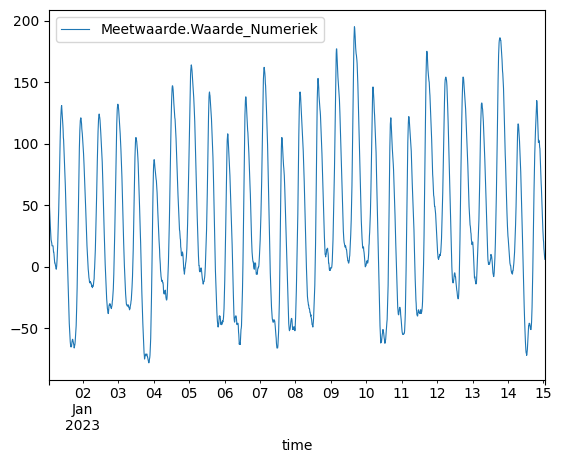

In [14]:
# A dataframe can be easily plotted
measurements.plot(y="Meetwaarde.Waarde_Numeriek", linewidth=0.8)


## ddlpy: other useful features
In ddlpy there are several other useful features available:
* access to the other Waterwebservices endpoints via `ddlpy.measurements_latest()`, `ddlpy.measurements_available()` and `ddlpy.measurements_amount()`
* simplifying the returned measurement dataframe by dropping constant columns
* size-efficient conversion to xarray.Dataset


In [15]:
# `ddlpy.simplify_dataframe()` drops constant columns
# if needed, some columns can be preserved
meas_simple = ddlpy.simplify_dataframe(measurements, always_preserve=["WaardeBepalingsMethode.Code"])
meas_simple

,WaarnemingMetadata.Kwaliteitswaardecode,WaardeBepalingsMethode.Code,Meetwaarde.Waarde_Numeriek
time,,,
2023-01-01 01:00:00+01:00,00,other:F007,63.0
2023-01-01 01:10:00+01:00,00,other:F007,56.0
2023-01-01 01:20:00+01:00,00,other:F007,51.0
2023-01-01 01:30:00+01:00,00,other:F007,46.0
2023-01-01 01:40:00+01:00,00,other:F007,40.0
...,...,...,...
2023-01-15 00:20:00+01:00,00,other:F007,15.0
2023-01-15 00:30:00+01:00,00,other:F007,13.0
2023-01-15 00:40:00+01:00,00,other:F007,10.0


In [16]:
# these constant columns are added as attributes to the simplified DataFrame
meas_simple.attrs

{'WaarnemingMetadata.Statuswaarde': 'Gecontroleerd',
 'WaarnemingMetadata.Bemonsteringshoogte': '-999999999',
 'WaarnemingMetadata.Referentievlak': 'NVT',
 'WaarnemingMetadata.OpdrachtgevendeInstantie': 'RIKZMON_WAT',
 'Compartiment.Code': 'OW',
 'Compartiment.Omschrijving': 'Oppervlaktewater',
 'Grootheid.Code': 'WATHTE',
 'Grootheid.Omschrijving': 'Waterhoogte',
 'Eenheid.Code': 'cm',
 'Eenheid.Omschrijving': 'centimeter',
 'Hoedanigheid.Code': 'NAP',
 'Hoedanigheid.Omschrijving': 't.o.v. Normaal Amsterdams Peil',
 'Parameter.Code': 'NVT',
 'Parameter.Omschrijving': 'NVT',
 'BioTaxon.Code': 'NVT',
 'BioTaxon.Omschrijving': 'NVT',
 'BioTaxonType.Code': '',
 'BioTaxonType.Omschrijving': '',
 'Orgaan.Code': 'NVT',
 'Orgaan.Omschrijving': 'NVT',
 'Groepering.Code': '',
 'Groepering.Omschrijving': '',
 'Typering.Code': 'NVT',
 'Typering.Omschrijving': 'NVT',
 'BemonsteringsApparaat.Code': '8000',
 'BemonsteringsApparaat.Omschrijving': 'NVT',
 'BemonsteringsMethode.Code': 'NVT',
 'Bemonste

In [17]:
# `ddlpy.dataframe_to_xarray()` converts the DataFrame to an xarray object
# the input dataframe is first passed trough `ddlpy.simplify_dataframe()`
# all "*.Omschrijving" columns are converted to attributes of the "*.Code" variables
ds_meas = ddlpy.dataframe_to_xarray(measurements, always_preserve=["WaardeBepalingsMethode.Code"])
ds_meas

<xarray.Dataset> Size: 65kB
Dimensions:                                  (time: 2017)
Coordinates:
  * time                                     (time) datetime64[ns] 16kB 2023-...
Data variables:
    WaarnemingMetadata.Kwaliteitswaardecode  (time) object 16kB '00' ... '00'
    WaardeBepalingsMethode.Code              (time) object 16kB 'other:F007' ...
    Meetwaarde.Waarde_Numeriek               (time) float64 16kB 63.0 ... 6.0
Attributes: (12/45)
    WaarnemingMetadata.Statuswaarde:              Gecontroleerd
    WaarnemingMetadata.Bemonsteringshoogte:       -999999999
    WaarnemingMetadata.Referentievlak:            NVT
    WaarnemingMetadata.OpdrachtgevendeInstantie:  RIKZMON_WAT
    Compartiment.Code:                            OW
    Compartiment.Omschrijving:                    Oppervlaktewater
    ...                                           ...
    Meetwaarde.Waarde_Alfanumeriek:               63
    Code:                                         hoekvanholland
    Coordinatenstelsel:                           ETRS89
    Naam:                                         Hoek van Holland
    Lon:                                          4.119827
    Lat:                                          51.976899